# Hierarchical Clustering com o Dataset "Blobs"

## Introdução

O **Hierarchical Clustering** organiza os dados em uma hierarquia de agrupamentos. Para este exemplo, utilizaremos o dataset "Blobs", que contém 6 classes geradas aleatoriamente com distribuições distintas. Este dataset é útil para observar como o algoritmo lida com clusters separados e ruído.

---

## Etapas do Algoritmo

1. **Gerar o Dataset**:
   - Usamos o `make_blobs` para criar dados sintéticos com 6 classes.
   
2. **Construir o Dendrograma**:
   - Criamos a hierarquia de clusters e visualizamos o dendrograma.

3. **Escolher o Número de Clusters**:
   - Decidimos o número de clusters após analisar o dendrograma.

4. **Visualizar os Clusters**:
   - Representamos os clusters identificados em um gráfico 2D.


### 1. Gerar e Visualizar o Dataset


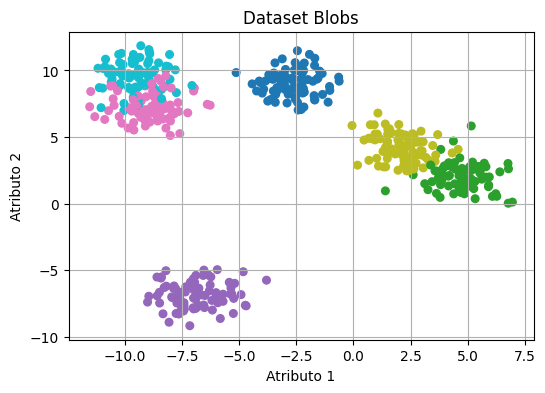

In [2]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Gerar o dataset "Blobs"
X, y = make_blobs(n_samples=500, centers=6, cluster_std=1.0, random_state=42)

# Visualizar o dataset original
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=30)
plt.title("Dataset Blobs")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.grid()
plt.show()

### 2. Construir o Dendrograma



# Ward's Method e Parâmetros do Dendrograma

## Ward's Method
O **Ward's Method** é um critério usado no Hierarchical Clustering para decidir quais clusters unir em cada etapa. Ele minimiza o aumento da **variância interna** ao combinar clusters. Isso garante que os agrupamentos fiquem compactos e homogêneos.

- A fusão é escolhida com base na menor soma das variações entre os clusters.

---

## Parâmetros do Dendrograma

1. **`Z`**:
   - Matriz de linkage com informações sobre as fusões (clusters unidos, distâncias e número de pontos).

2. **`truncate_mode`**:
   - Controla o nível de detalhe do dendrograma:
     - `'lastp'`: Mostra os últimos \( p \) clusters.
     - `'level'`: Mostra fusões até um nível específico.

3. **`p`**:
   - Número de clusters ou níveis a exibir no dendrograma.

4. **`leaf_rotation`**:
   - Ângulo dos rótulos das folhas (em graus, geralmente 90).

5. **`leaf_font_size`**:
   - Tamanho da fonte dos rótulos das folhas para melhor legibilidade

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [92.5, 92.5, 130.0, 130.0],
  [40.0, 40.0, 111.25, 111.25],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [170.0, 170.0, 202.5, 202.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [240.0, 240.0, 280.0, 280.0],
  [186.25, 186.25, 260.0, 260.0],
  [75.625, 75.625, 223.125, 223.125],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 33

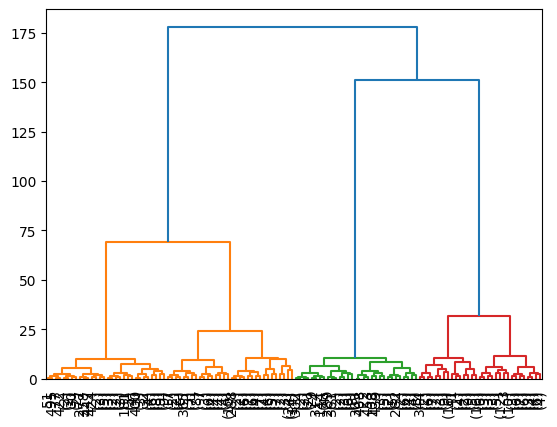

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode='level', p=6, leaf_rotation=90, leaf_font_size=10)

### 3. Escolher o Número de Clusters

In [13]:
# Aplicar Agglomerative Clustering com 6 clusters
agglomerative = AgglomerativeClustering(n_clusters=6, linkage='ward')
clusters = agglomerative.fit_predict(X)


# Passos para Escolher o Número de Clusters

## 1. Analisar as Alturas no Dendrograma
- Procure **grandes saltos** na altura das linhas verticais.
- Um grande salto indica que clusters muito distantes foram unidos, sugerindo um bom ponto para interromper a fusão.

---

## 2. Cortar o Dendrograma
- Trace uma **linha horizontal** em um ponto específico do dendrograma.
- Cada linha vertical que cruza essa linha representa um cluster.

---

## 3. Definir o Número de Clusters
- O número de **linhas verticais que cruzam a linha horizontal** será o número de clusters escolhidos.

---

## Exemplo
- Imagine um dendrograma com 10 pontos.
- Se você cortar o dendrograma em uma altura onde há **3 grupos bem definidos**, terá **3 clusters**.


### 4. Visualizar os Clusters Gerados

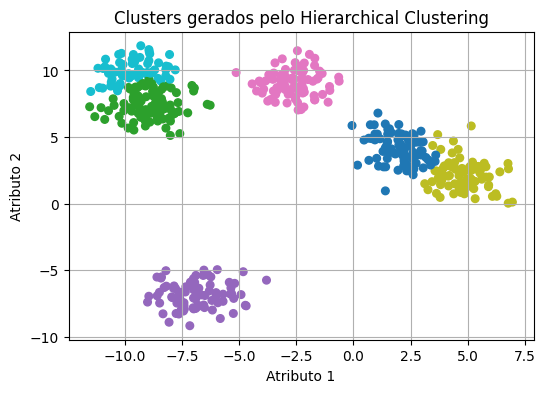

In [14]:
# Visualizar os clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=30)
plt.title("Clusters gerados pelo Hierarchical Clustering")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.grid()
plt.show()


In [ ]:
### 2. Construir o Dendrograma